In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

In [3]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    product TEXT,
    quantity INTEGER,
    price float
)
""")

In [4]:
cursor.executemany("""
INSERT INTO sales (product, quantity, price)
VALUES (?, ?, ?)
""", [
    ('Laptop', 5, 50000),
    ('Mouse', 10, 500),
    ('Keyboard', 7, 1500),
    ('Printer', 3, 52000),
    ('Mouse', 8, 550),
    ('TV', 5, 50000),
    ('Mouse', 10, 500),
    ('Keyboard', 7, 1500),
    ('Laptop', 3, 52000),
    ('Mouse', 8, 550)
])

conn.commit()

In [5]:
query = """
SELECT 
    product, 
    SUM(quantity) AS total_quantity,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

In [6]:
df = pd.read_sql_query(query, conn)
print(df)

    product  total_quantity   revenue
0  Keyboard              14   21000.0
1    Laptop               8  406000.0
2     Mouse              36   18800.0
3   Printer               3  156000.0
4        TV               5  250000.0


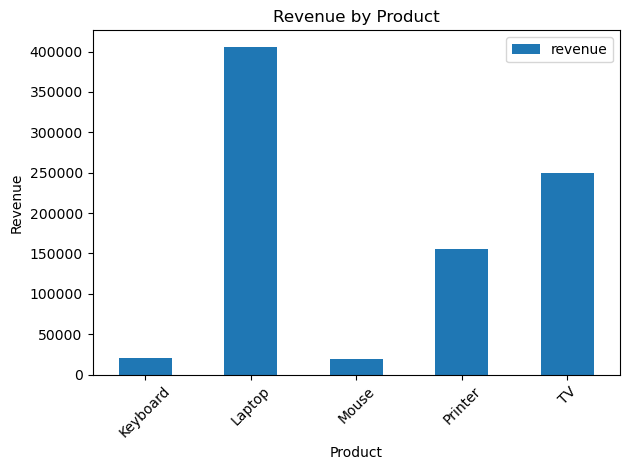

In [7]:
df.plot(kind='bar', x='product', y='revenue')

plt.title("Revenue by Product")
plt.ylabel("Revenue")
plt.xlabel("Product")
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig("sales_chart.png")   # Save chart
plt.show()

In [8]:
conn.close()